In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [87]:
data = data.drop('encounter_id', axis=1)

In [88]:
data = data.replace('?', np.nan)

In [89]:
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)

In [90]:
display(data.iloc[12])

patient_nbr                               85504905
race                                     Caucasian
gender                                      Female
age                                        [40-50)
weight                                         NaN
admission_type_id                                1
discharge_disposition_id                         3
admission_source_id                              7
time_in_hospital                                 7
payer_code                                     NaN
medical_specialty           Family/GeneralPractice
num_lab_procedures                              60
num_procedures                                   0
num_medications                                 15
number_outpatient                                0
number_emergency                                 1
number_inpatient                                 0
diag_1                                         428
diag_2                                      250.43
diag_3                         

In [91]:
count_ones = data['readmitted'].sum()

In [92]:
print(count_ones)

11357


In [93]:
data['readmitted'] = data['readmitted'].astype(bool)

In [94]:
missing_percentages = data.isnull().sum() / len(data) * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
data = data.drop(columns_to_drop, axis=1)

In [95]:
no_variation_cols = ['examide', 'citoglipton']


# Drop all columns 
data = data.drop(no_variation_cols, axis=1) 
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                            'glyburide-metformin', 
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [96]:
data.shape

(101766, 31)

In [97]:
data.isnull().sum()

patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
insulin                         0
change                          0
diabetesMed   

In [98]:
print(data.dtypes)

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change              

In [99]:
data.head(5)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,...,None,No,No,No,No,No,No,No,No,False
1,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,...,None,No,No,No,No,No,Up,Ch,Yes,False
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,...,None,No,Steady,No,No,No,No,No,Yes,False
3,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,...,None,No,No,No,No,No,Up,Ch,Yes,False
4,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,...,None,No,Steady,No,No,No,Steady,Ch,Yes,False


In [100]:
missing_race_readmitted_counts = data[data['medical_specialty'].isna()]['readmitted'].value_counts()

In [101]:
print(missing_race_readmitted_counts)

False    44168
True      5781
Name: readmitted, dtype: int64


In [102]:
columns_to_fill = ['diag_1', 'diag_2', 'diag_3']
for column in columns_to_fill:
    data[column].fillna('Not_Diagnosed', inplace=True)

# Check if there are any remaining missing values in these columns
missing_values_after_fill = data[columns_to_fill].isna().sum()
print(missing_values_after_fill)

diag_1    0
diag_2    0
diag_3    0
dtype: int64


In [103]:
for column in ['race']:
    most_frequent = data[column].mode()[0]
    data[column].fillna(most_frequent, inplace=True)

# Re-check missing values to confirm changes
data.isna().mean().sort_values(ascending=False).head()

medical_specialty    0.490822
payer_code           0.395574
readmitted           0.000000
number_emergency     0.000000
race                 0.000000
dtype: float64

In [104]:
columns_to_fill_additional = ['medical_specialty', 'payer_code']
for column in columns_to_fill_additional:
    data[column].fillna('Undisclosed', inplace=True)

# Verify changes
print(data[columns_to_fill_additional].isna().sum())

medical_specialty    0
payer_code           0
dtype: int64


In [105]:
numerical_columns = data.select_dtypes(include=np.number)

In [106]:
print(numerical_columns.describe())

        patient_nbr  admission_type_id  discharge_disposition_id  \
count  1.017660e+05      101766.000000             101766.000000   
mean   5.433040e+07           2.024006                  3.715642   
std    3.869636e+07           1.445403                  5.280166   
min    1.350000e+02           1.000000                  1.000000   
25%    2.341322e+07           1.000000                  1.000000   
50%    4.550514e+07           1.000000                  1.000000   
75%    8.754595e+07           3.000000                  4.000000   
max    1.895026e+08           8.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count        101766.000000     101766.000000       101766.000000   
mean              5.754437          4.395987           43.095641   
std               4.064081          2.985108           19.674362   
min               1.000000          1.000000            1.000000   
25%               1.000000          2.000000   

In [107]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [108]:
print(numeric_columns)

Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object')


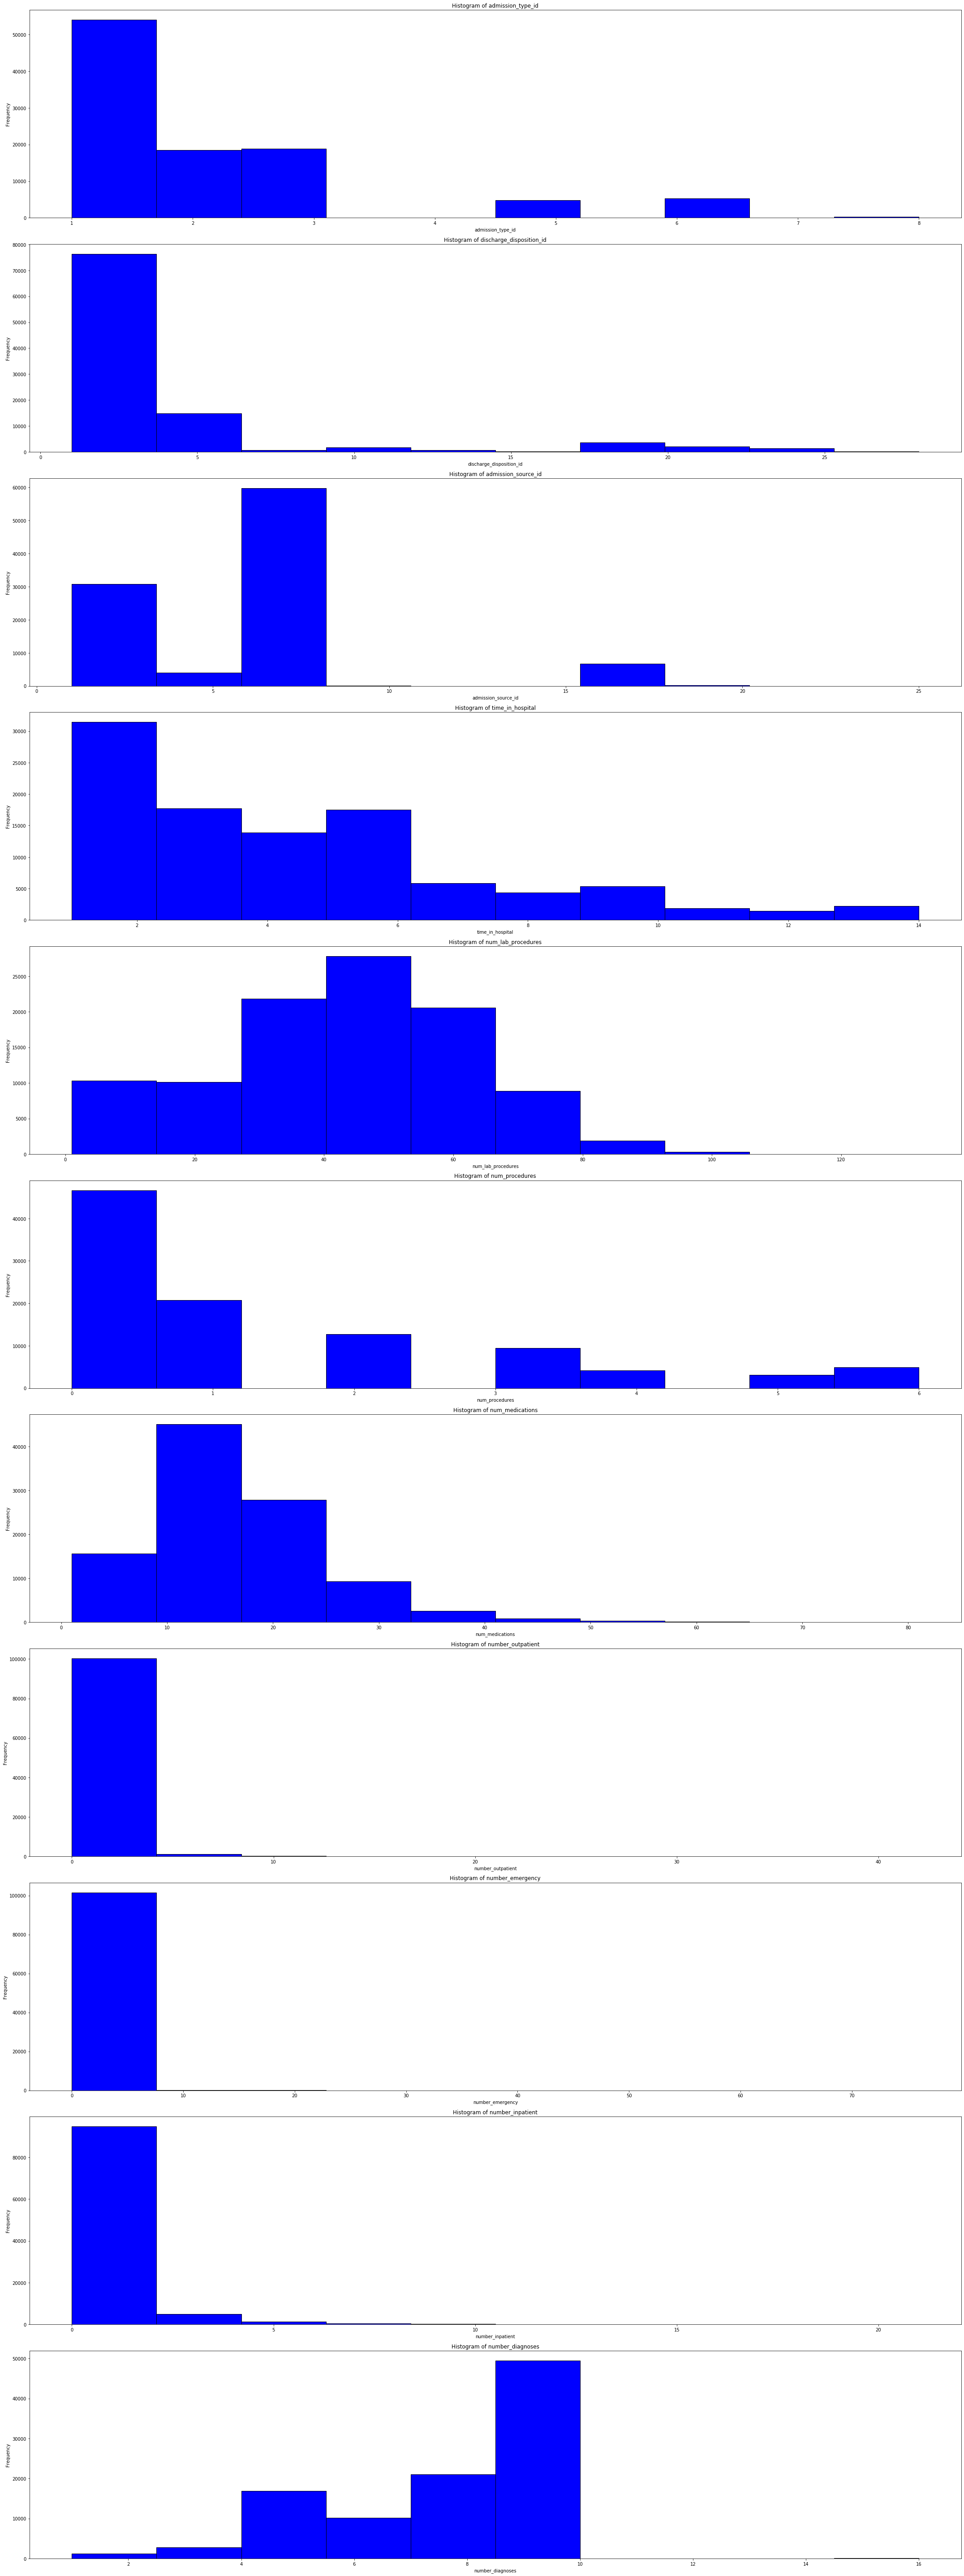

In [109]:
features = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a figure and subplots (2 rows, 1 column in this case)
fig, axes = plt.subplots(11, 1, figsize=(30, 80))  # Adjust figsize as needed

# Plot histograms for each feature on separate subplots
for i, feature in enumerate(features):
  axes[i].hist(data[feature], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Histogram of {feature}')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

In [110]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to hold the outlier percentages for each numeric column
outlier_percentages = {}

# Calculate and store the outlier percentages for each column
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the number of outliers and the percentage
    total_count = data[column].count()
    outliers_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].count()
    outlier_percentage = (outliers_count / total_count) * 100
    
    # Store the percentage in the dictionary
    outlier_percentages[column] = outlier_percentage

# Print the outlier percentages for each column
outlier_percentages

{'patient_nbr': 0.24271367647347836,
 'admission_type_id': 0.3350824440382839,
 'discharge_disposition_id': 9.647622978204902,
 'admission_source_id': 6.8352887997956095,
 'time_in_hospital': 2.2129198357015114,
 'num_lab_procedures': 0.14051844427411905,
 'num_procedures': 4.868030579957943,
 'num_medications': 2.5126270070554018,
 'number_outpatient': 16.44851915177957,
 'number_emergency': 11.185464693512568,
 'number_inpatient': 6.92667492089696,
 'number_diagnoses': 0.27612365623096125}

In [111]:
import numpy as np

# List of columns to apply log transformation and remove outliers
columns = [
    'time_in_hospital', 'num_procedures', 'number_inpatient', 'number_diagnoses'
]

# Apply log transformation (adding 1 to avoid log(0))
for column in columns:
    data[f'log_{column}'] = np.log1p(data[column])

In [112]:
# Function to remove outliers based on the IQR method for log-transformed data
def remove_outliers_log_transformed(df, log_column):
    Q1 = df[log_column].quantile(0.25)
    Q3 = df[log_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[log_column] >= lower_bound) & (df[log_column] <= upper_bound)]

# Apply outlier removal for each log-transformed column
for column in columns:
    log_column = f'log_{column}'
    data = remove_outliers_log_transformed(data, log_column)

# Note: This will reduce the size of the dataset by removing rows with outliers in any of the transformed columns

In [113]:
data.shape

(95728, 35)

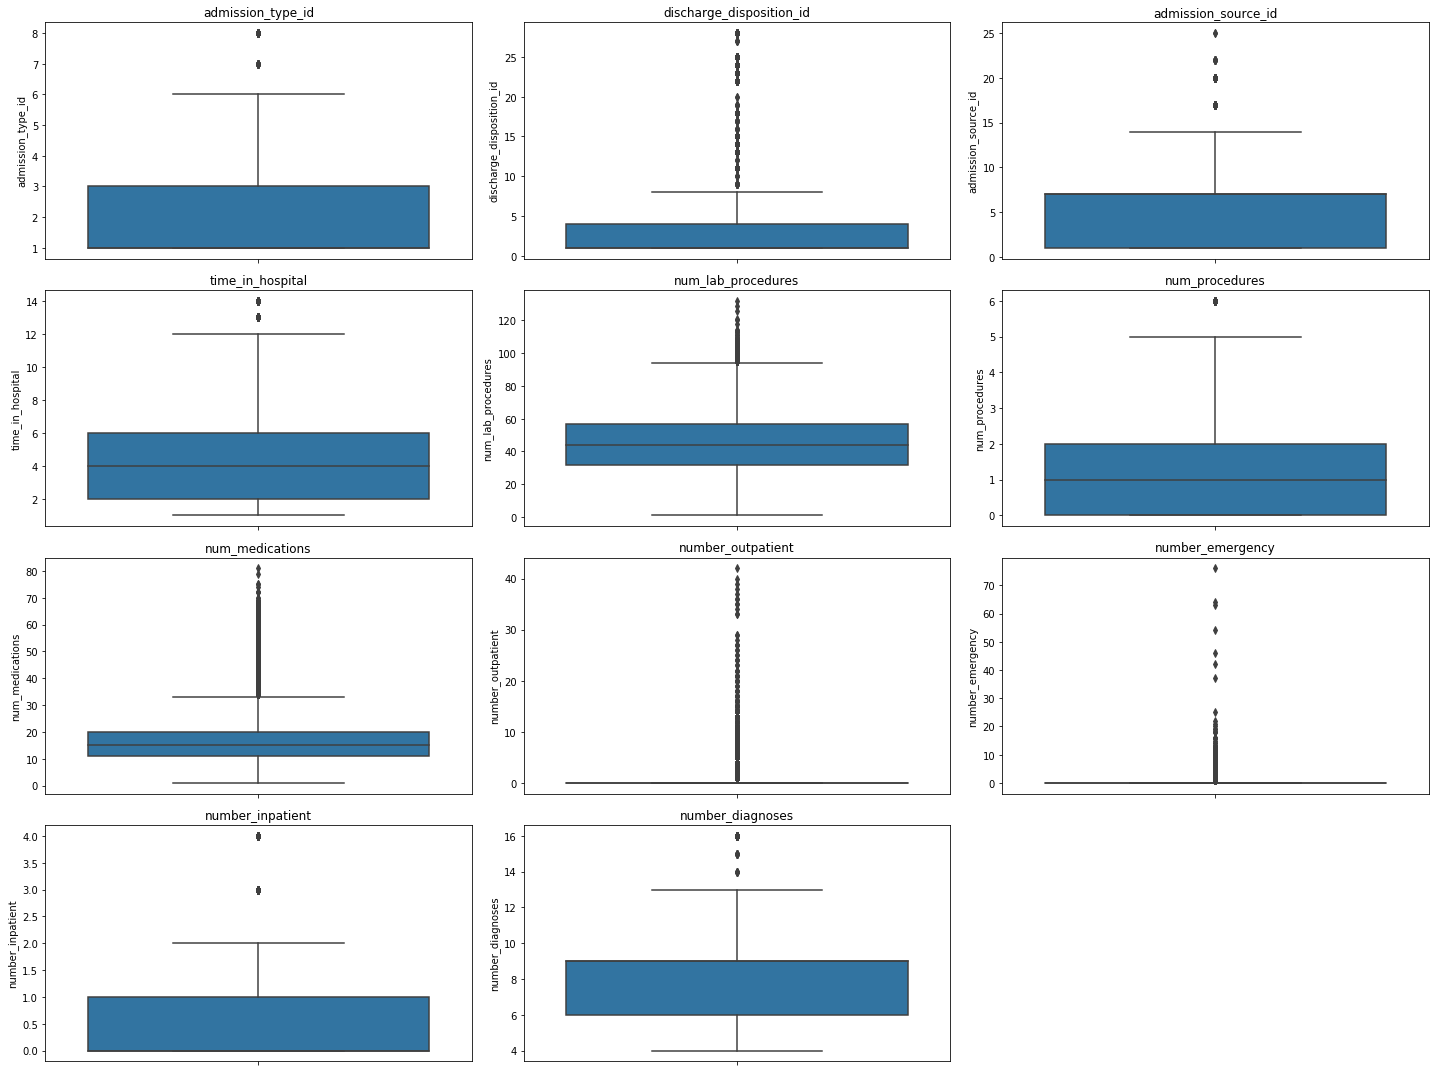

In [114]:
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [115]:
feature = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

In [116]:
columns_to_convert = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# Convert the specified columns to strings
data[columns_to_convert] = data[columns_to_convert].astype(str)

print(data.dtypes)

patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
glipizide                    object
glyburide                    object
pioglitazone                 object
rosiglitazone                object
insulin                     

In [117]:

diabetic_data_outliers_handled = data.copy()

# List of features to apply Z-score method
z_score_features = ['num_lab_procedures', 'num_medications' ]  # Assuming normal distribution

# List of features to apply IQR method
iqr_features = ['time_in_hospital', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

# Apply Z-score method for assumed normal distribution features
for feature in z_score_features:
    z_scores = np.abs(stats.zscore(diabetic_data_outliers_handled[feature]))
    filtered_entries = (z_scores < 3)  # Filtering out data points that are more than 3 standard deviations away
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Apply IQR method for skewed distribution features
for feature in iqr_features:
    Q1 = diabetic_data_outliers_handled[feature].quantile(0.25)
    Q3 = diabetic_data_outliers_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((diabetic_data_outliers_handled[feature] >= (Q1 - 1.5 * IQR)) & 
                        (diabetic_data_outliers_handled[feature] <= (Q3 + 1.5 * IQR)))
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Calculate the final size of the dataset after outlier handling
final_data_size_outliers_handled = len(diabetic_data_outliers_handled) / len(data) * 100

final_data_size_outliers_handled

67.6458298512452

In [118]:
diabetic_data_modified_outliers = data.copy()

# Apply modified IQR method for skewed distribution features with a less strict range
for feature in iqr_features:
    Q1 = diabetic_data_modified_outliers[feature].quantile(0.25)
    Q3 = diabetic_data_modified_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((diabetic_data_modified_outliers[feature] >= (Q1 - 2.5 * IQR)) & 
                        (diabetic_data_modified_outliers[feature] <= (Q3 + 2.5 * IQR)))
    diabetic_data_modified_outliers = diabetic_data_modified_outliers[filtered_entries]

# Calculate the final size of the dataset after modified outlier handling
final_data_size_modified_outliers = len(diabetic_data_modified_outliers) / len(data) * 100

final_data_size_modified_outliers

75.7939160956042

In [119]:
diabetic_data_modified_outliers.shape

(72556, 35)